In [2]:
#Import all the libraries

import torch
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader, random_split
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import torch.nn as nn
import torchvision.models as models

In [3]:
path="/content/drive/MyDrive/animals/animals"

In [30]:
#creating transformations

data_transforms = transforms.Compose(
        [
         transforms.Resize(size=(128,128)),
         transforms.ToTensor(),
        ])

In [31]:
#loading the data

data = torchvision.datasets.ImageFolder(root=path,
                                        transform=data_transforms)


In [32]:
class_names=data.classes
num_classes=len(class_names)

In [33]:
#get all the classes from the data
list1=data.class_to_idx

In [34]:
type(data)

torchvision.datasets.folder.ImageFolder

In [35]:
list1

{'antelope': 0,
 'badger': 1,
 'bat': 2,
 'bear': 3,
 'bee': 4,
 'beetle': 5,
 'bison': 6,
 'boar': 7,
 'butterfly': 8,
 'cat': 9,
 'caterpillar': 10,
 'chimpanzee': 11,
 'cockroach': 12,
 'cow': 13,
 'coyote': 14,
 'crab': 15,
 'crow': 16,
 'deer': 17,
 'dog': 18,
 'dolphin': 19,
 'donkey': 20,
 'dragonfly': 21,
 'duck': 22,
 'eagle': 23,
 'elephant': 24,
 'flamingo': 25,
 'fly': 26,
 'fox': 27,
 'goat': 28,
 'goldfish': 29,
 'goose': 30,
 'gorilla': 31,
 'grasshopper': 32,
 'hamster': 33,
 'hare': 34,
 'hedgehog': 35,
 'hippopotamus': 36,
 'hornbill': 37,
 'horse': 38,
 'hummingbird': 39,
 'hyena': 40,
 'jellyfish': 41,
 'kangaroo': 42,
 'koala': 43,
 'ladybugs': 44,
 'leopard': 45,
 'lion': 46,
 'lizard': 47,
 'lobster': 48,
 'mosquito': 49,
 'moth': 50,
 'mouse': 51,
 'octopus': 52,
 'okapi': 53,
 'orangutan': 54,
 'otter': 55,
 'owl': 56,
 'ox': 57,
 'oyster': 58,
 'panda': 59,
 'parrot': 60,
 'pelecaniformes': 61,
 'penguin': 62,
 'pig': 63,
 'pigeon': 64,
 'porcupine': 65,
 'pos

In [36]:
#class_names
img, label = data[100]
img.shape


torch.Size([3, 128, 128])

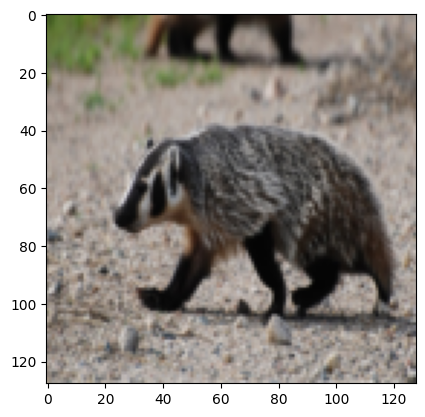

In [37]:
img = np.transpose(img, (1, 2, 0))

# Now you can display the image
plt.imshow(img)
plt.show()

In [38]:
#creating the train, validation, test set

torch.manual_seed(42)
val_size = len(data)//10
test_size = len(data)//5
train_size = len(data) - val_size -test_size

In [39]:
train_ds, val_ds, test_ds = random_split(data, [train_size, val_size, test_size])
len(train_ds), len(val_ds),len(test_ds)

(3780, 540, 1080)

In [40]:
batch_size = 32
train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size*2, )
test_loader = DataLoader(test_ds, batch_size*2,)

In [41]:
train_loader

In [58]:
#coded A small CNN

class tiny(nn.Module):
  def __init__(self,
             input_shape: int,
             hidden_units: int,
             output_shape: int):
    super().__init__()
    self.conv_block1=nn.Sequential(
        nn.Conv2d(in_channels=input_shape,
              out_channels=hidden_units,
              kernel_size=3,
              padding=1,
              stride=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3, stride= 1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.conv_block2=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              padding=1,
              stride=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3, stride= 1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.conv_block3=nn.Sequential(
        nn.Conv2d(in_channels=hidden_units,
              out_channels=hidden_units,
              kernel_size=3,
              padding=1,
              stride=1),
        nn.ReLU(),
        nn.Conv2d(
            in_channels=hidden_units,
            out_channels= hidden_units,
            kernel_size=3, stride= 1, padding=1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2, stride=2)
        )
    self.classifier=nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*32*32,
                  out_features=output_shape)
    )
  def forward(self,x):
    x=self.conv_block1(x)
    print(x.shape)
    x=self.conv_block2(x)
    print(x.shape)
    x=self.classifier(x)
    print(x.shape)
    return x

In [59]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

device

device(type='cuda')

In [60]:
#Getting the dumpy images

image_batch,label_batch=next(iter(train_loader))

In [61]:
image_batch=image_batch.to(device)

In [62]:
image_batch.shape, label_batch.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [63]:
torch.manual_seed(42)

model_0=tiny(input_shape=3,
                hidden_units=512,
                output_shape=len(class_names)).to(device)

In [64]:
model_0(image_batch)

torch.Size([32, 512, 64, 64])
torch.Size([32, 512, 32, 32])
torch.Size([32, 90])


tensor([[-0.0027,  0.0138,  0.0036,  ..., -0.0060,  0.0052,  0.0105],
        [-0.0059,  0.0147, -0.0010,  ...,  0.0013,  0.0172,  0.0027],
        [-0.0097,  0.0071, -0.0012,  ...,  0.0039,  0.0135, -0.0014],
        ...,
        [-0.0106,  0.0100, -0.0010,  ..., -0.0023,  0.0194,  0.0153],
        [-0.0069,  0.0149,  0.0020,  ...,  0.0012,  0.0140,  0.0088],
        [-0.0059,  0.0132,  0.0020,  ...,  0.0005,  0.0240,  0.0094]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [77]:
#using trained model form torch vision

class NeuralNet(nn.Module):
    def __init__(self):
        super(NeuralNet, self).__init__()

        # Use pre-trained model
        self.model = models.densenet121(pretrained=True)

        # Freeze all layers (No training)
        for param in self.parameters():
            param.requires_grad = False

        # Change final FC layer to num_classes output. This is trainable by default
        self.model.classifier = nn.Linear(1024, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

dense = NeuralNet().to(device)

# Model Summary
#print(model)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=DenseNet121_Weights.IMAGENET1K_V1`. You can also use `weights=DenseNet121_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [78]:
dense(image_batch)

tensor([[ 0.2208,  0.1165, -1.3004,  ...,  0.1189,  0.1316, -0.2490],
        [ 0.6326,  0.0813, -0.3508,  ..., -0.4688,  0.2004,  0.3467],
        [-0.6169,  0.1852, -0.7796,  ..., -0.0732,  0.2269,  0.0348],
        ...,
        [ 0.5977,  0.1601,  0.1217,  ...,  0.1047,  0.5588, -0.0542],
        [ 0.0130, -0.9198, -0.1328,  ..., -0.4042,  0.2588,  0.2192],
        [-0.5334,  0.3486,  0.3718,  ..., -0.2559,  0.2050, -0.3114]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [70]:
def train_step(model, data, loss_fn, optim):
  model.train()

  train_loss, train_acc=0,0
  correct = 0
  total = 0
  for batch, (X,y)in enumerate(data):
    X=X.to(device)
    y=y.to(device)
    y_pred=model(X)
    loss=loss_fn(y_pred,y)
    train_loss+=loss.item()
    optim.zero_grad()
    loss.backward()
    optim.step()
    y_pred_class=torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
    train_acc+=((y_pred_class==y).sum().item()/len(y_pred_class))
  train_loss=train_loss/len(data)
  train_acc=train_acc/len(data)
  print(f"train Loss: {train_loss:.4f}, TRAIN ACCURACY:{train_acc}")
  return train_loss

In [71]:
def val_step(model,data,loss_fn):
  model.eval()
  val_loss1, val_acc1=0,0
  correct = 0
  total = 0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data):
      X=X.to(device)
      y=y.to(device)
      val_pred_logit=model(X)
      loss=loss_fn(val_pred_logit, y)
      val_loss1+=loss.item()

      val_pred_label=val_pred_logit.argmax(dim=1)
      val_acc1+=((val_pred_label==y).sum().item()/len(val_pred_label))


  val_loss1=val_loss1/len(data)
  val_acc1 = val_acc1/len(data)
  print(f"val Loss: {val_loss1:.4f},  VAL_ACC:{val_acc1}")
  return val_loss1, val_acc1

In [144]:
def test_step(model,data,loss_fn):
  model.eval()
  test_loss=0
  correct = 0
  total = 0
  with torch.inference_mode():
    for batch,(X,y) in enumerate(data):
      X=X.to(device)
      y=y.to(device)
      test_pred_logit=model(X)
      loss=loss_fn(test_pred_logit, y)
      test_loss+=loss.item()

      test_pred_label=test_pred_logit.argmax(dim=1)
      test_acc+=((test_pred_label==y).sum().item()/len(test_pred_label))
  test_loss=test_loss/len(data)
  test_acc = correct /len(data)
  print(f"test Loss: {test_loss:.4f}, test_acc:{test_acc}")
  return test_loss

In [79]:
torch.manual_seed(42)
from tqdm.auto import tqdm


Loss_fn=nn.CrossEntropyLoss()

dense_optimizer=torch.optim.Adam(params=dense.parameters(),lr=0.001)


In [80]:
epochs=6

for epoch in tqdm(range(epochs)):
  train_step(model=dense,
             data=train_loader,
             loss_fn=Loss_fn,
             optim=dense_optimizer)

  val_step(model=dense,
           data=val_loader,
           loss_fn=Loss_fn)

  0%|          | 0/6 [00:00<?, ?it/s]

train Loss: 2.8317, TRAIN ACCURACY:0.4099264705882353
val Loss: 1.6025,  VAL_ACC:0.6537698412698413
train Loss: 1.1627, TRAIN ACCURACY:0.7833508403361344
val Loss: 1.1099,  VAL_ACC:0.7420634920634921
train Loss: 0.7727, TRAIN ACCURACY:0.8626575630252101
val Loss: 0.9595,  VAL_ACC:0.7524801587301587
train Loss: 0.6175, TRAIN ACCURACY:0.8839285714285714
val Loss: 0.8621,  VAL_ACC:0.777281746031746
train Loss: 0.4734, TRAIN ACCURACY:0.9162289915966386
val Loss: 0.8220,  VAL_ACC:0.7876984126984127
train Loss: 0.3733, TRAIN ACCURACY:0.9390756302521008
val Loss: 0.7927,  VAL_ACC:0.8003472222222222


In [145]:
class NeuralNet(nn.Module):
    def __init__(self, model_architecture, num_classes):
        super(NeuralNet, self).__init__()

        # Use the provided model architecture
        self.model = model_architecture(pretrained=True)

        # Freeze all layers (No training)
        for param in self.model.parameters():
            param.requires_grad = False


        self.model.classifier = nn.Linear(25088, num_classes)

    def forward(self, x):
        x = self.model(x)
        return x


device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model_architecture = models.vgg16
num_classes = 90
VGG = NeuralNet(model_architecture, num_classes).to(device)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [111]:
VGG(image_batch)

tensor([[ 0.1976,  0.6761,  0.3126,  ..., -0.3646, -0.3126, -0.3533],
        [-0.3242,  0.2229,  0.6764,  ..., -0.6936, -0.5014, -0.9729],
        [-0.9010, -0.2015,  0.5101,  ..., -0.7657, -0.6059, -0.8075],
        ...,
        [-1.0404,  0.9079, -1.3077,  ...,  0.2292,  0.4371,  0.7634],
        [-1.0424,  0.4213,  0.1040,  ..., -1.7381, -1.3538, -1.0463],
        [ 0.0054,  0.6023, -0.3959,  ...,  0.3119,  0.0236, -0.4962]],
       device='cuda:0', grad_fn=<AddmmBackward0>)

In [115]:
optimizer1=torch.optim.Adam(params=VGG.parameters(),lr=0.001)

In [116]:
epochs=5

for epoch in tqdm(range(epochs)):
  train_step(model=VGG,
             data=train_loader,
             loss_fn=Loss_fn,
             optim=optimizer1)

  val_step(model=VGG,
           data=val_loader,
           loss_fn=Loss_fn)

  0%|          | 0/5 [00:00<?, ?it/s]

train Loss: 2.2525, TRAIN ACCURACY:0.48161764705882354
val Loss: 1.3266,  VAL_ACC:0.6609623015873016
train Loss: 0.4378, TRAIN ACCURACY:0.9340861344537815
val Loss: 1.1425,  VAL_ACC:0.7073412698412699
train Loss: 0.1733, TRAIN ACCURACY:0.9921218487394958
val Loss: 1.0689,  VAL_ACC:0.7204861111111112
train Loss: 0.0866, TRAIN ACCURACY:0.9989495798319328
val Loss: 1.0296,  VAL_ACC:0.730406746031746
train Loss: 0.0522, TRAIN ACCURACY:0.9997373949579832
val Loss: 1.0252,  VAL_ACC:0.7234623015873016


In [93]:
test_img=torchvision.io.read_image("/content/download (2).jpeg").type(torch.float32)/255

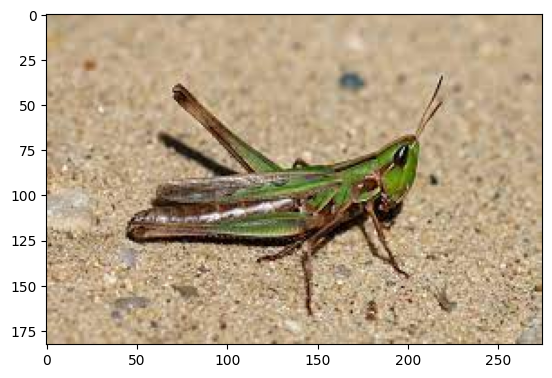

In [94]:
plt.imshow(test_img.permute(1,2,0))

In [95]:
type(test_img)

torch.Tensor

In [96]:
test_transfrom=transforms.Compose([
    transforms.Resize(size=(128,128))]
)

In [97]:
tt_img=test_transfrom(test_img)

/usr/local/lib/python3.10/dist-packages/torchvision/transforms/functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


In [98]:
tt_img.shape

torch.Size([3, 128, 128])

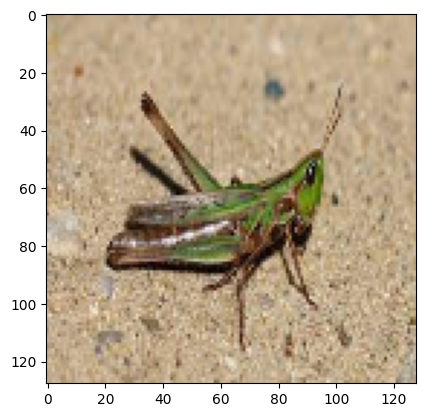

In [99]:
plt.imshow(tt_img.permute(1,2,0))

In [100]:
dense.eval()
with torch.inference_mode():
  test=dense(tt_img.unsqueeze(0).to(device))

In [101]:
test

tensor([[-10.5447, -13.3529, -14.0033, -13.5252, -10.3634, -11.3574, -20.3781,
         -16.0883, -13.1106, -14.4198, -10.4385, -20.4334,  -4.3867, -14.3106,
          -9.8523, -10.5950, -11.9540, -13.1592,  -9.2565, -18.0706,  -9.9614,
          -9.3361, -10.0114, -13.6002, -19.7773, -16.5419,  -6.5071, -10.1467,
         -12.0951, -12.5603, -14.9289, -19.3812,   4.4467, -16.4249, -10.5928,
         -13.7024, -16.7213, -15.2964, -13.5043, -10.7819, -10.1037, -17.4969,
         -12.3521, -14.6891, -12.6029, -17.3213, -13.6052,  -6.5442, -10.3749,
         -10.8903,  -6.9251, -13.7065, -11.4390, -17.7475, -11.5977, -15.7251,
          -8.0634, -11.0533, -12.5425, -15.7772, -10.2608,  -6.6607, -14.3441,
         -17.1677, -10.0496, -15.6266, -13.0058, -12.3320, -13.2557, -13.3517,
         -19.6824, -10.9560, -19.2724, -13.7321, -13.8220, -13.6541, -13.3305,
          -8.0327, -12.9447, -14.8319, -13.7574, -11.1126, -16.0666, -11.1339,
         -12.4897, -14.0294, -13.0342, -18.4834, -12

In [102]:
test_prob=torch.softmax(test, dim=1)

In [103]:
test_label=torch.argmax(test_prob, dim=1).cpu()

In [104]:
class_names[test_label]

'grasshopper'

In [131]:
def custom_img_predict(path,models):
  test_img=torchvision.io.read_image(path).type(torch.float32)/255
  plt.imshow(test_img.permute(1,2,0))
  tt_img=test_transfrom(test_img)
  models.eval()
  with torch.inference_mode():
    test=dense(tt_img.unsqueeze(0).to(device))

  test_prob=torch.softmax(test, dim=1)
  test_label=torch.argmax(test_prob, dim=1).cpu()
  name=class_names[test_label]
  print(f"the animal predicted by is {name}")
  #return  img

the animal predicted by the  is jellyfish


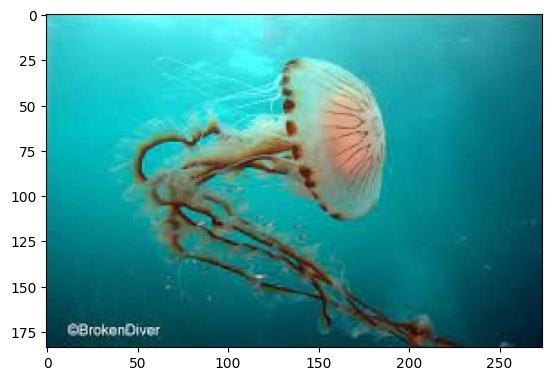

In [132]:
custom_img_predict('/content/download (1).jpeg',models=VGG)